<a href="https://colab.research.google.com/github/mohnish05/MyProjects/blob/master/Crime_analysis_of_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)


In [2]:
dataset = pd.read_csv("modified_police_department_data.csv", error_bad_lines=False)
dataset.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,latitude,longitude
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29-01-2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,37.775421,-122.403405
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29-01-2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,37.775421,-122.403405
2,141059263,WARRANTS,WARRANT ARREST,25-04-2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,37.729981,-122.388856
3,160013662,NON-CRIMINAL,LOST PROPERTY,05-01-2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,37.785788,-122.412971
4,160002740,NON-CRIMINAL,LOST PROPERTY,01-01-2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,37.765050,-122.419672


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_id          150500 non-null  int64  
 1   category             150500 non-null  object 
 2   crime_description    150500 non-null  object 
 3   crime_date           150500 non-null  object 
 4   department_district  150499 non-null  object 
 5   resolution           150500 non-null  object 
 6   address              150500 non-null  object 
 7   department_id        150500 non-null  float64
 8   latitude             150500 non-null  float64
 9   longitude            150500 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 11.5+ MB


In [5]:
dataset['crime_date'] = pd.to_datetime(dataset['crime_date'])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   incident_id          150500 non-null  int64         
 1   category             150500 non-null  object        
 2   crime_description    150500 non-null  object        
 3   crime_date           150500 non-null  datetime64[ns]
 4   department_district  150499 non-null  object        
 5   resolution           150500 non-null  object        
 6   address              150500 non-null  object        
 7   department_id        150500 non-null  float64       
 8   latitude             150500 non-null  float64       
 9   longitude            150500 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 11.5+ MB


In [57]:
df1=pd.DataFrame({"year": dataset['crime_date'].dt.year,
              "month": dataset['crime_date'].dt.month,
              "day": dataset['crime_date'].dt.day,
              "hour": dataset['crime_date'].dt.hour,
              "dayofyear": dataset['crime_date'].dt.dayofyear,
              "week": dataset['crime_date'].dt.week,
              "weekofyear": dataset['crime_date'].dt.weekofyear,
              "dayofweek": dataset['crime_date'].dt.dayofweek,
              "weekday": dataset['crime_date'].dt.weekday,
              "quarter": dataset['crime_date'].dt.quarter,
             })

conversion={0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}

df1['weekday'] = df1['weekday'].map(conversion)

In [8]:
dataset1=dataset.drop(['crime_date','incident_id','address','department_id'] ,axis=1)

In [58]:
data=pd.concat([dataset1, df1],axis=1)
data.head()

,category,crime_description,department_district,resolution,latitude,longitude,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",37.775421,-122.403405,2016,1,29,11,29,4,4,4,friday,1
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",37.775421,-122.403405,2016,1,29,11,29,4,4,4,friday,1
2,WARRANTS,WARRANT ARREST,BAYVIEW,"ARREST, BOOKED",37.729981,-122.388856,2016,4,25,14,116,17,17,0,monday,2
3,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,NONE,37.785788,-122.412971,2016,5,1,23,122,17,17,6,sunday,2
4,NON-CRIMINAL,LOST PROPERTY,MISSION,NONE,37.765050,-122.419672,2016,1,1,0,1,53,53,4,friday,1


In [59]:
data.isnull().sum()

category               0
crime_description      0
department_district    1
resolution             0
latitude               0
longitude              0
year                   0
month                  0
day                    0
hour                   0
dayofyear              0
week                   0
weekofyear             0
dayofweek              0
weekday                0
quarter                0
dtype: int64

In [11]:
data['department_district'].fillna(data['department_district'].mode()[0], inplace = True)
data.isnull().sum()

category               0
crime_description      0
department_district    0
resolution             0
latitude               0
longitude              0
year                   0
month                  0
day                    0
hour                   0
dayofyear              0
week                   0
weekofyear             0
dayofweek              0
weekday                0
quarter                0
dtype: int64

In [60]:
data.head()

,category,crime_description,department_district,resolution,latitude,longitude,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",37.775421,-122.403405,2016,1,29,11,29,4,4,4,friday,1
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",37.775421,-122.403405,2016,1,29,11,29,4,4,4,friday,1
2,WARRANTS,WARRANT ARREST,BAYVIEW,"ARREST, BOOKED",37.729981,-122.388856,2016,4,25,14,116,17,17,0,monday,2
3,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,NONE,37.785788,-122.412971,2016,5,1,23,122,17,17,6,sunday,2
4,NON-CRIMINAL,LOST PROPERTY,MISSION,NONE,37.765050,-122.419672,2016,1,1,0,1,53,53,4,friday,1


# VISUALISATION

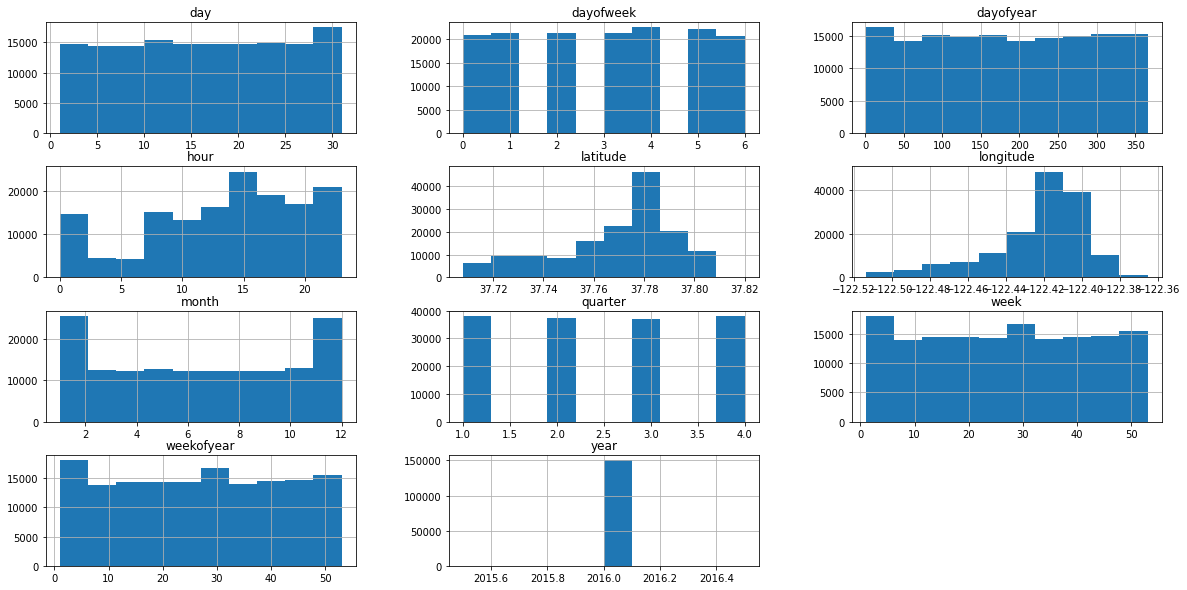

In [97]:
data.hist()
plt.show()

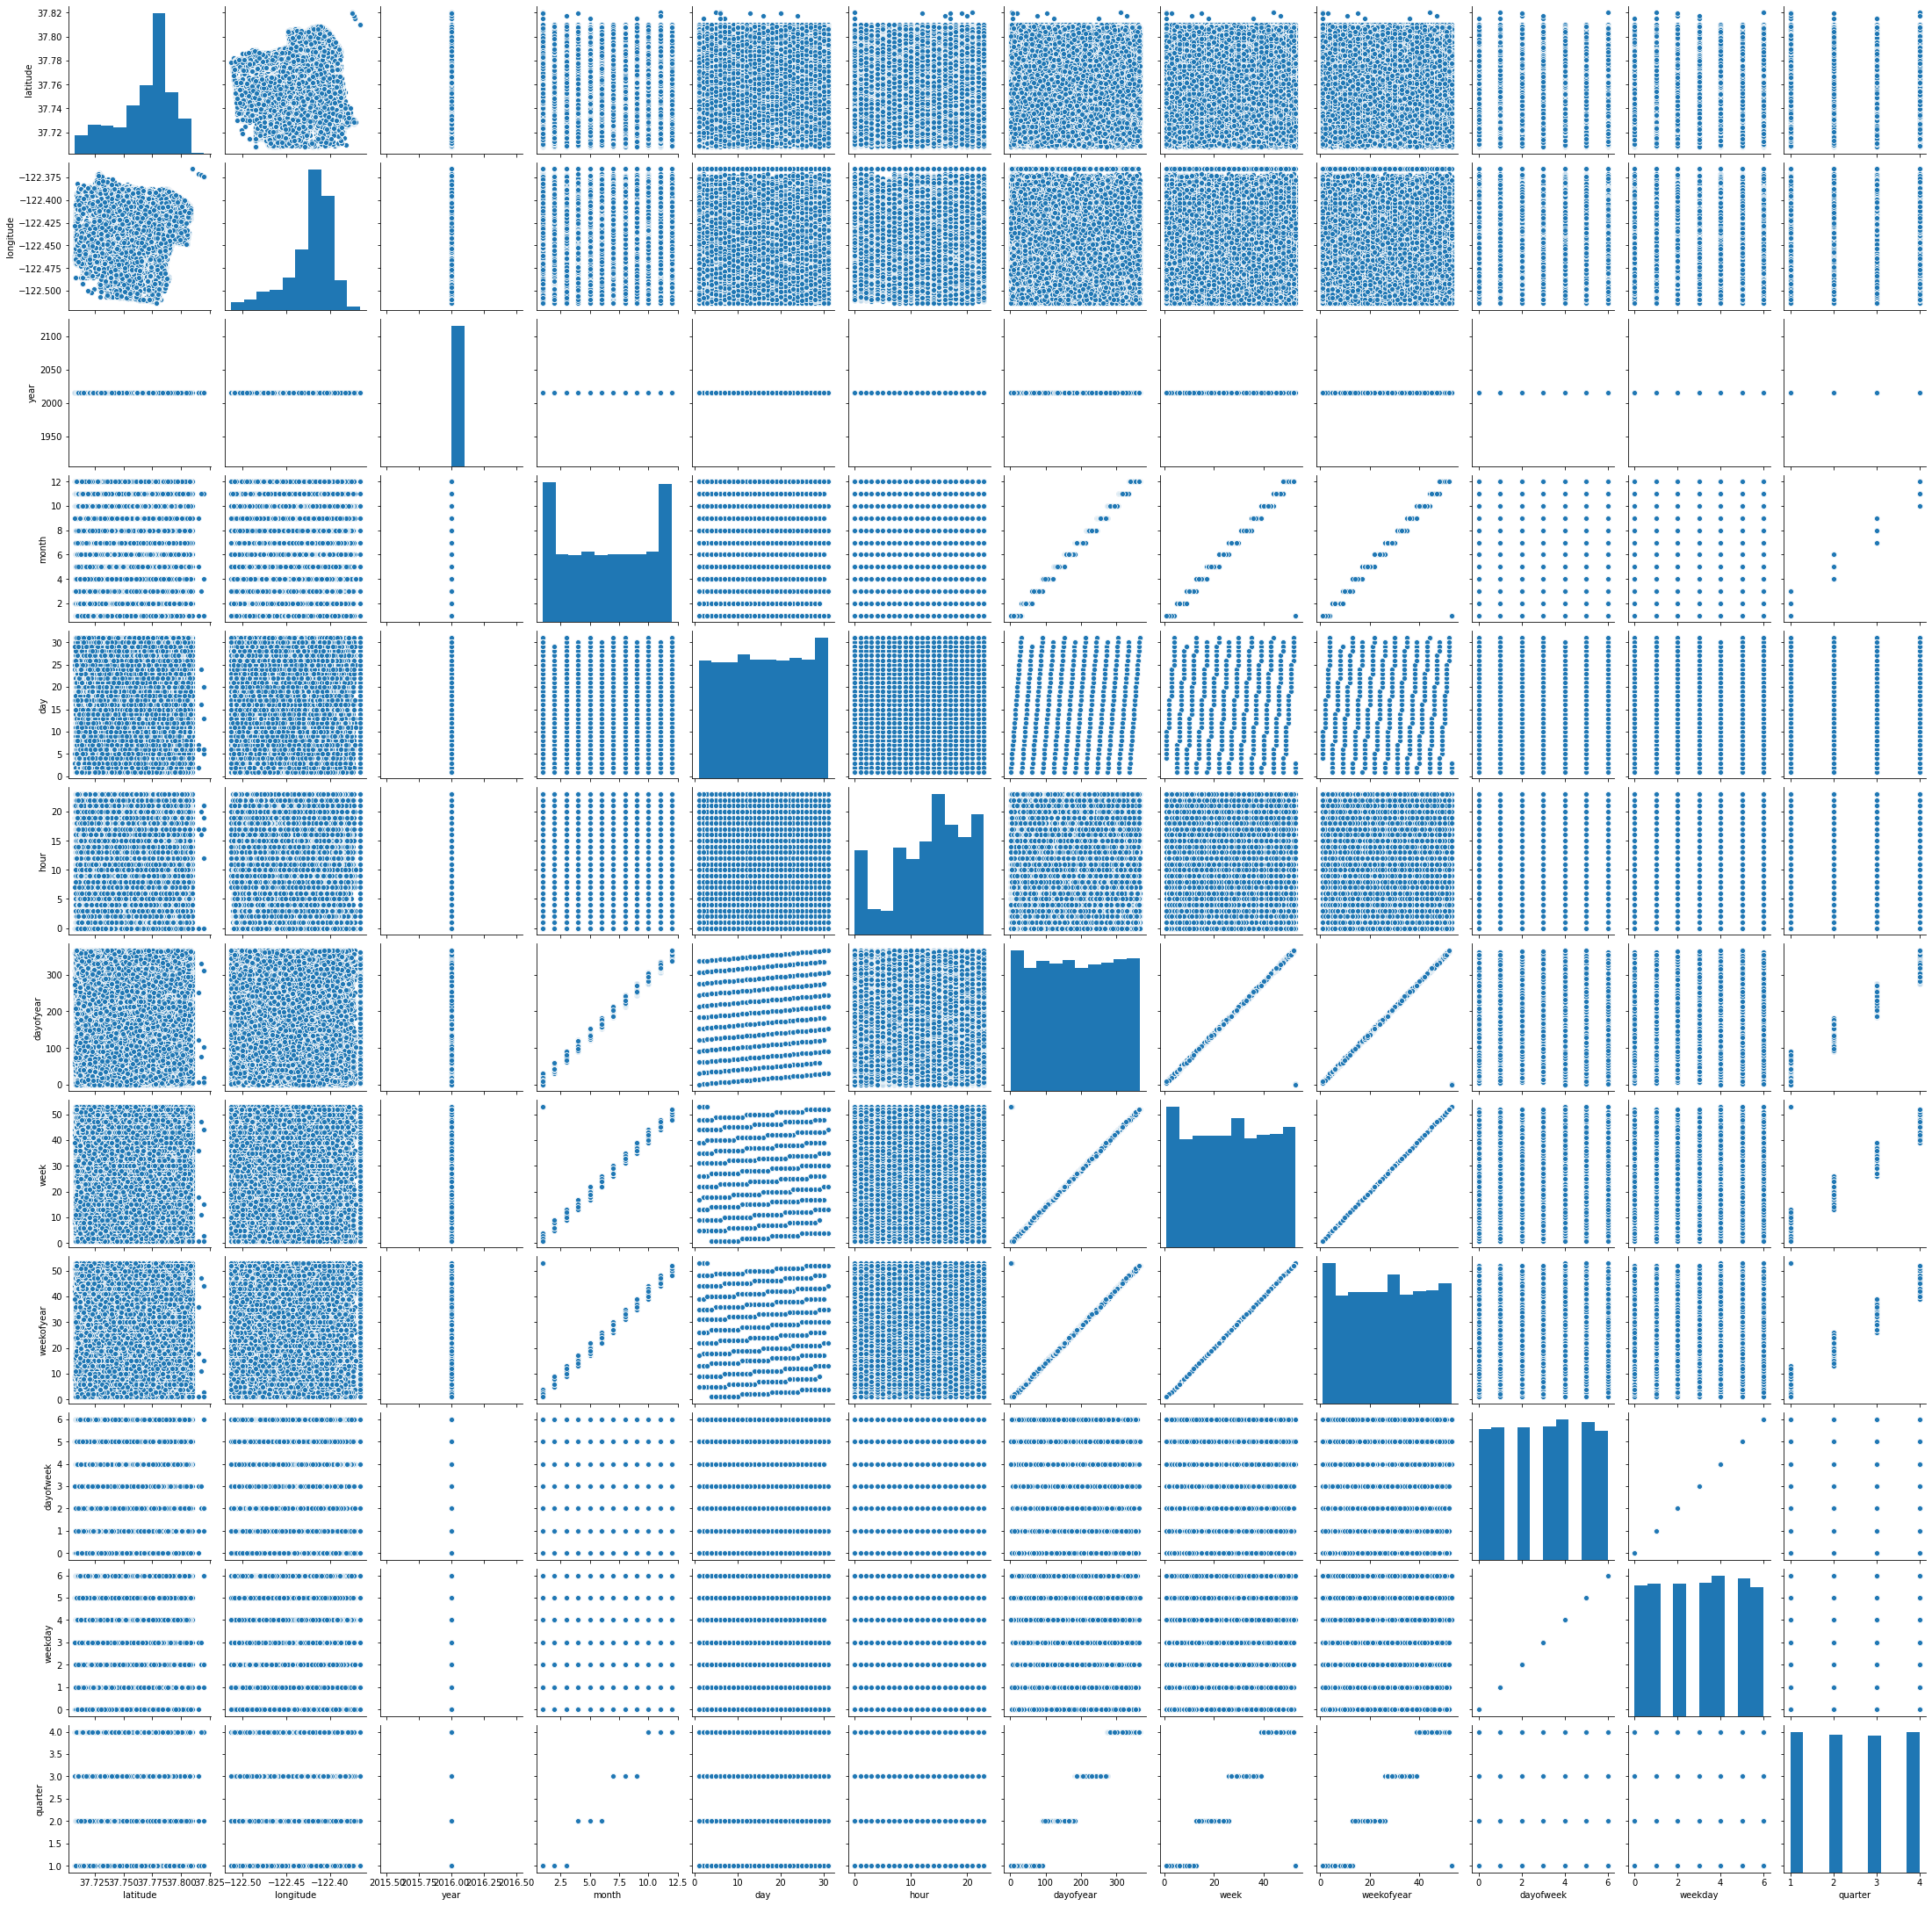

In [13]:
sns.pairplot(data)
plt.show()

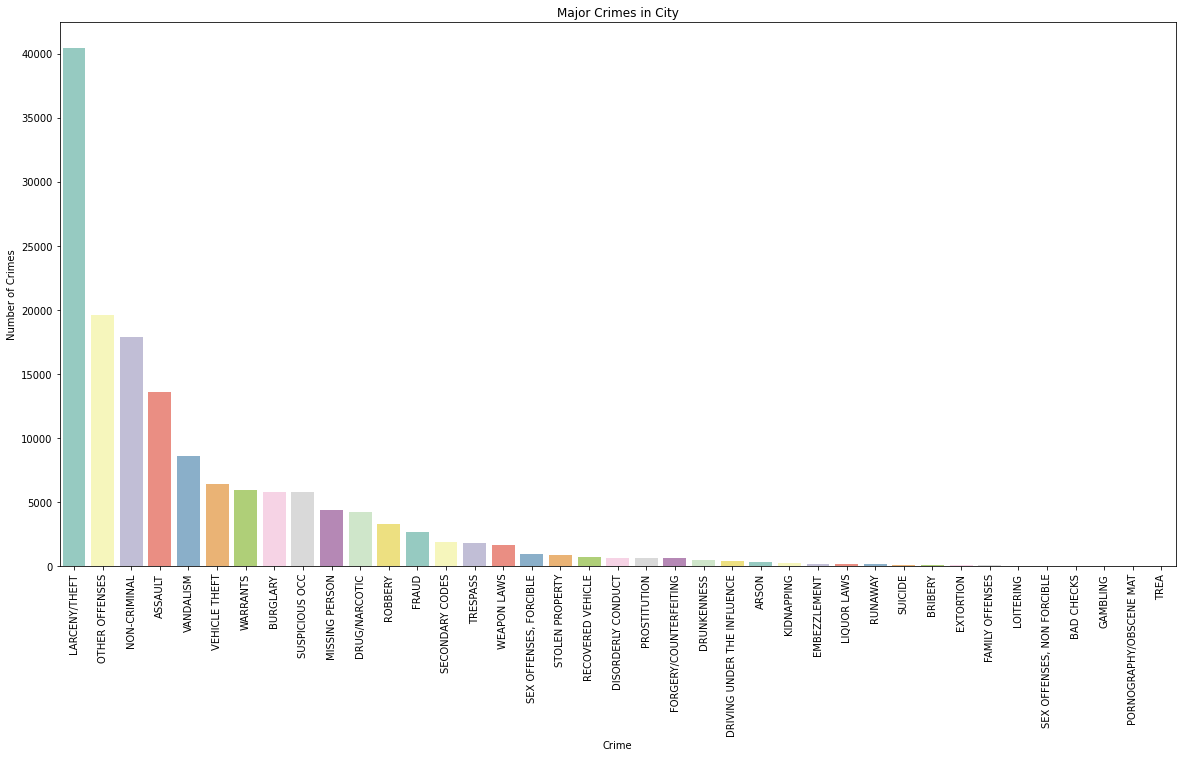

In [49]:
plt.rcParams['figure.figsize'] = (20, 10)

sns.countplot(data['category'], palette= "Set3",  order = data['category'].value_counts().index)
plt.title("Major Crimes in City")
plt.xlabel("Crime")
plt.ylabel("Number of Crimes")
plt.xticks(rotation = 90)
plt.show()

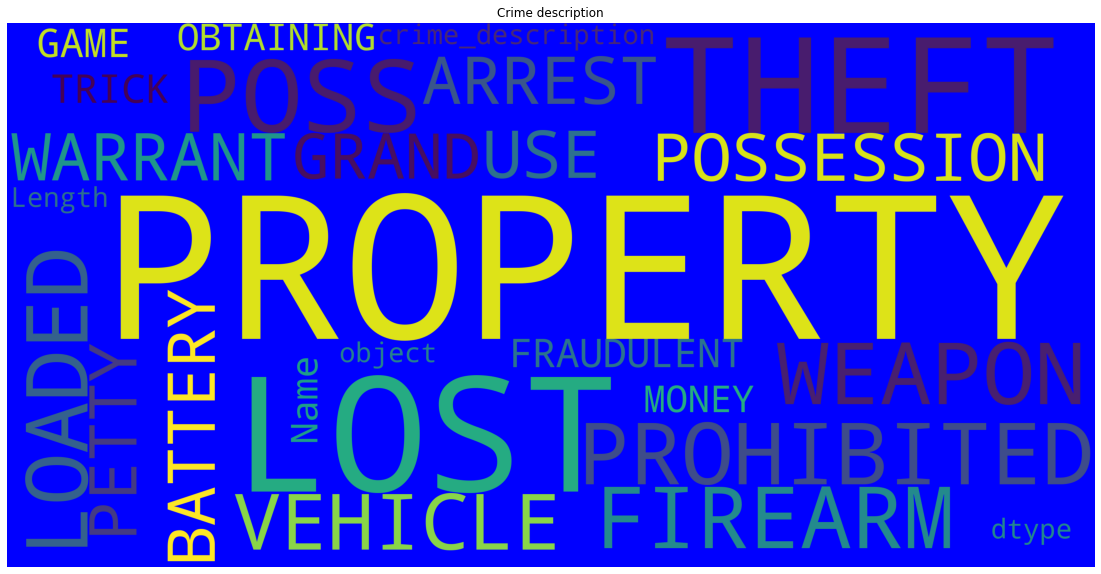

In [21]:
plt.rcParams['figure.figsize'] = (20, 10)
from wordcloud import WordCloud

w_c = WordCloud(background_color = 'blue', width = 3000, height =1500).generate(str(data['crime_description']))
plt.title('Crime description', fontsize = 12)

plt.imshow(w_c)
plt.axis('off')
plt.show()

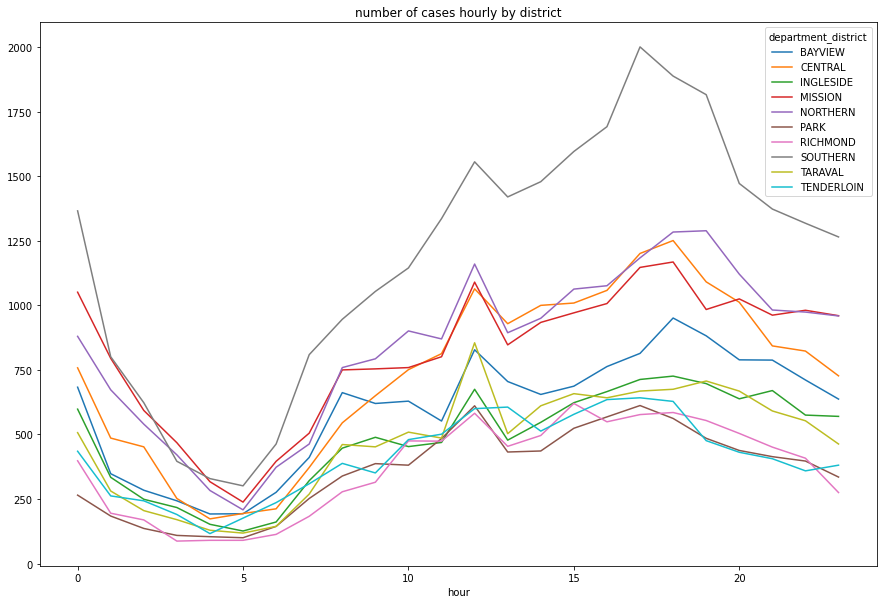

In [135]:
hourly_district_events = data[['department_district','hour','category']].groupby(['department_district','hour']).count().reset_index()
hourly_district_events_pivot = hourly_district_events.pivot(index='hour', columns='department_district', values='category').fillna(method='ffill')
hourly_district_events_pivot.interpolate().plot(title='number of cases hourly by district', figsize=(15,10))
plt.show()

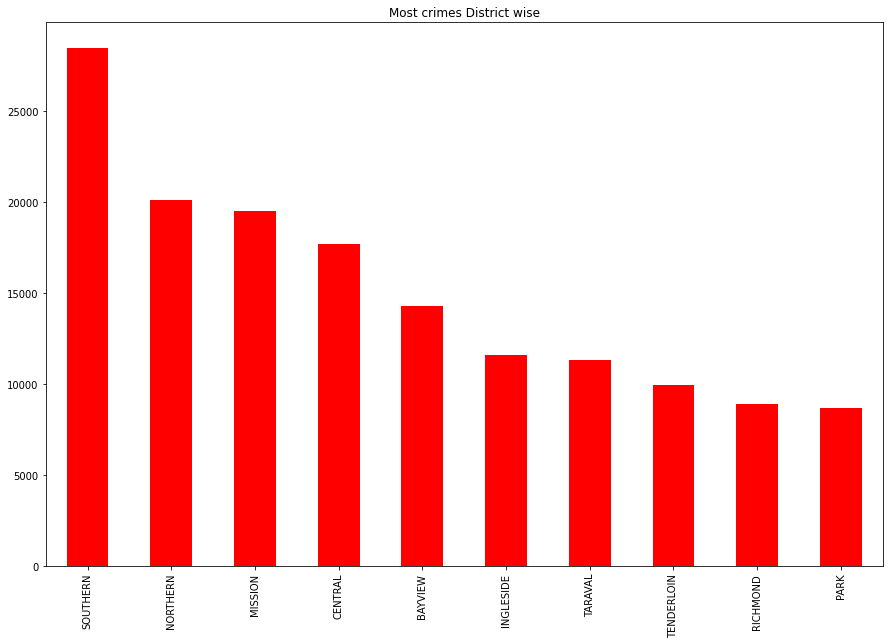

In [23]:
#Plotting district wise crime rate

data.department_district.value_counts().plot.bar(color = 'red', figsize = (15,10))
plt.title("Most crimes District wise")
plt.xticks(rotation = 90)
plt.show()

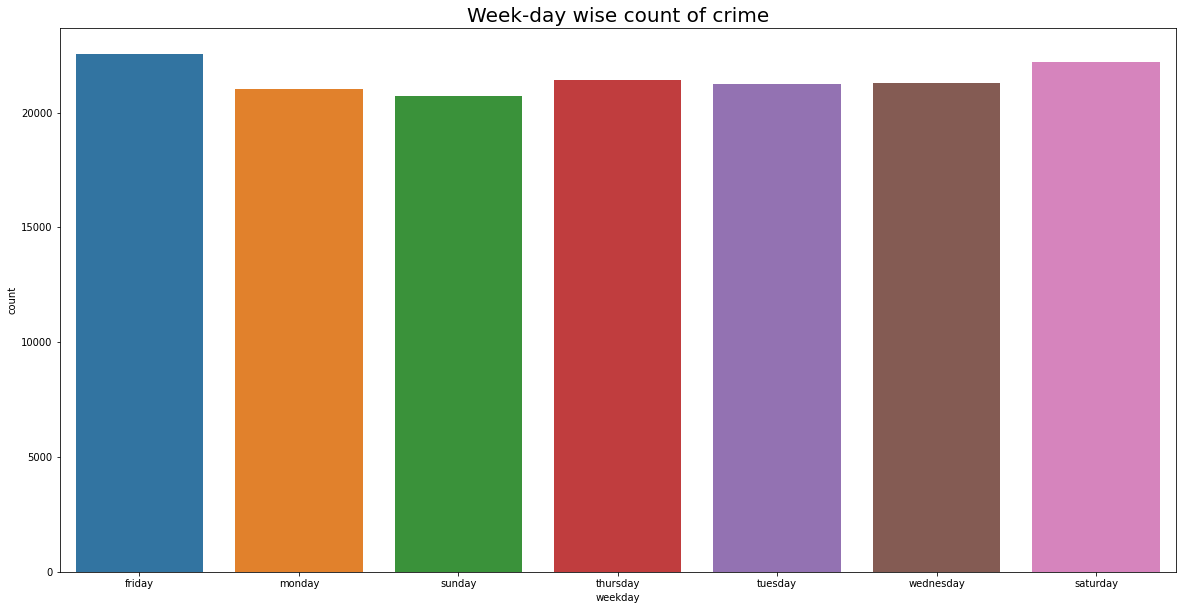

In [62]:
# week-day wise count of crime

sns.countplot(data['weekday'])

plt.title('Week-day wise count of crime',fontsize = 20)

plt.xticks()
plt.show()


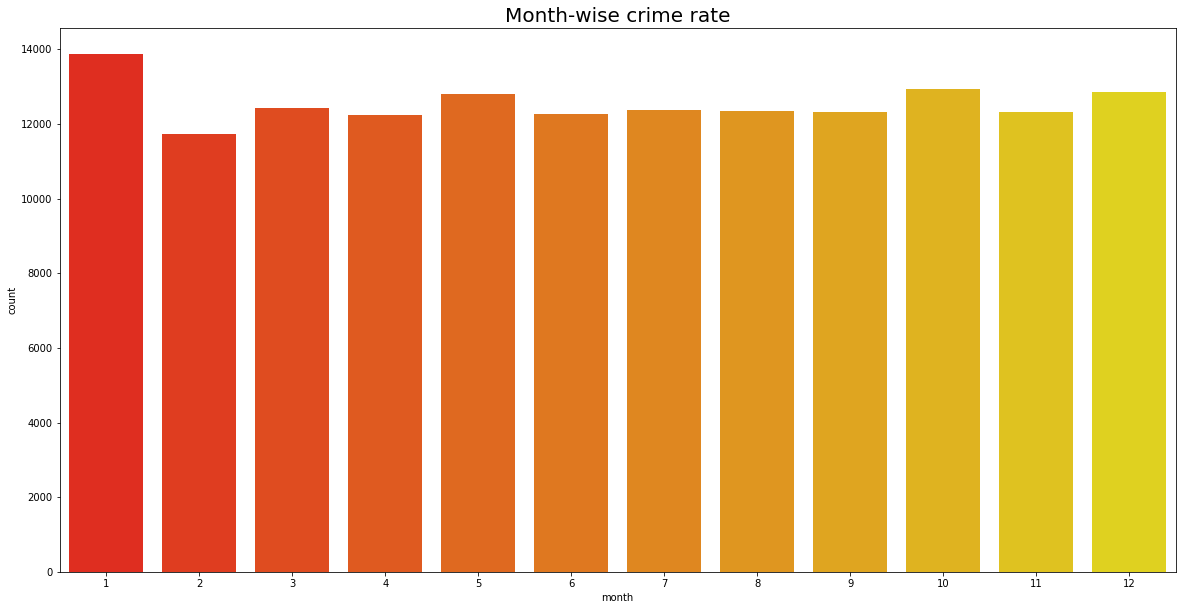

In [29]:
#Month wise crime rate
sns.countplot(data['month'], palette = 'autumn')
plt.title('Month-wise crime rate', fontsize = 20)

plt.show()

In [30]:
data.columns

Index(['category', 'crime_description', 'department_district', 'resolution',
       'latitude', 'longitude', 'year', 'month', 'day', 'hour', 'dayofyear',
       'week', 'weekofyear', 'dayofweek', 'weekday', 'quarter'],
      dtype='object')

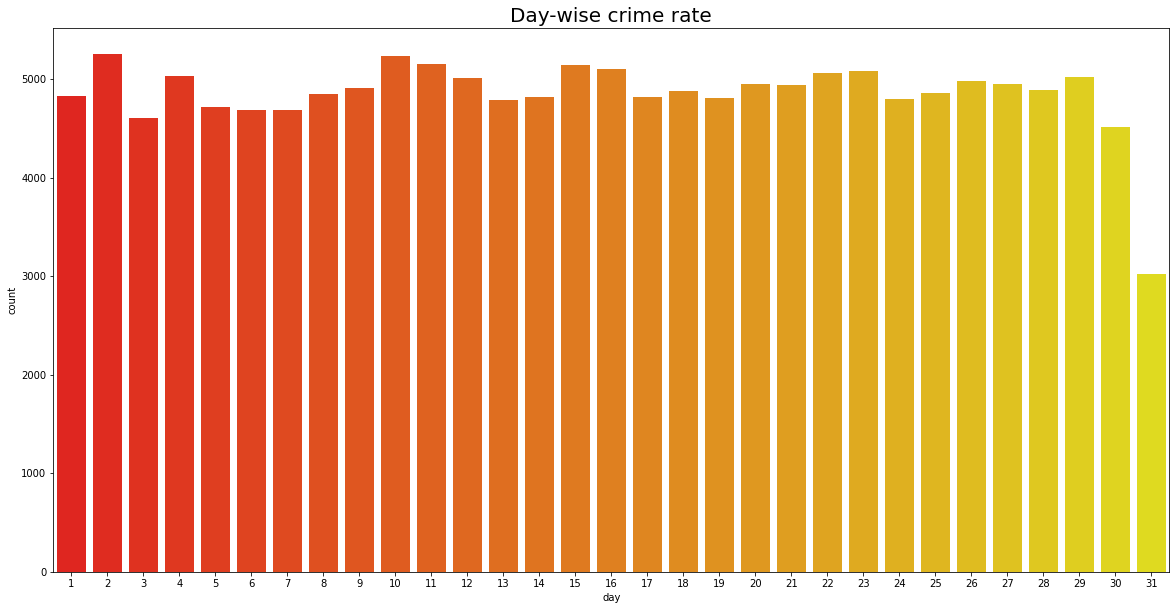

In [31]:
#day wise crime rate
sns.countplot(data['day'], palette = 'autumn')
plt.title('Day-wise crime rate', fontsize = 20)

plt.show()

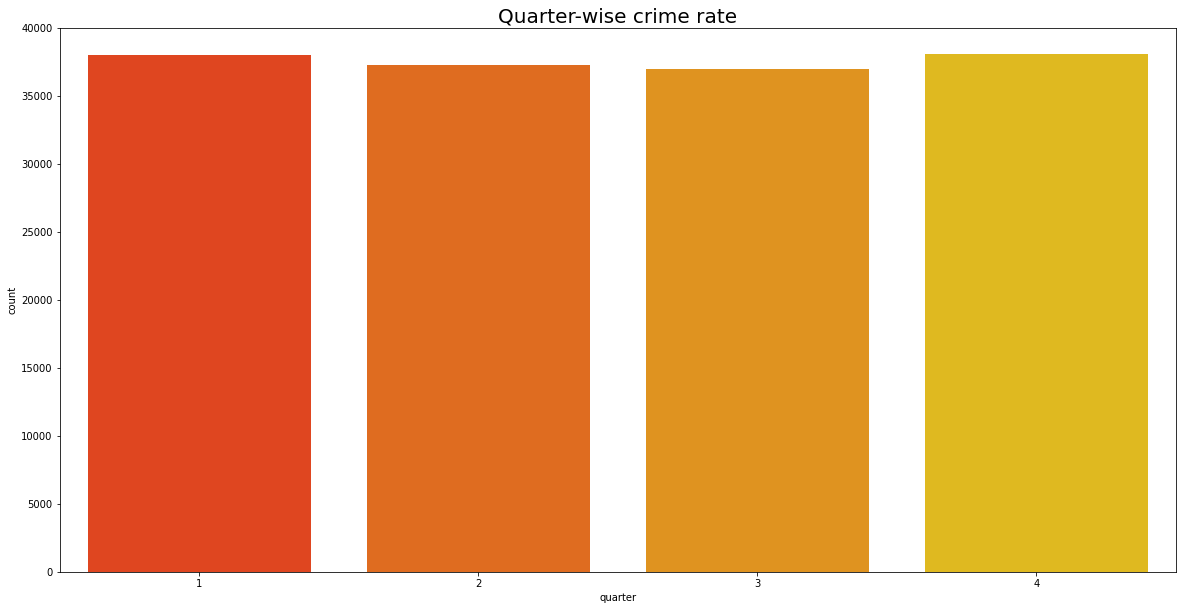

In [41]:
#quarter wise crime rate
sns.countplot(data['quarter'], palette = 'autumn')
plt.title('Quarter-wise crime rate', fontsize = 20)

plt.show()

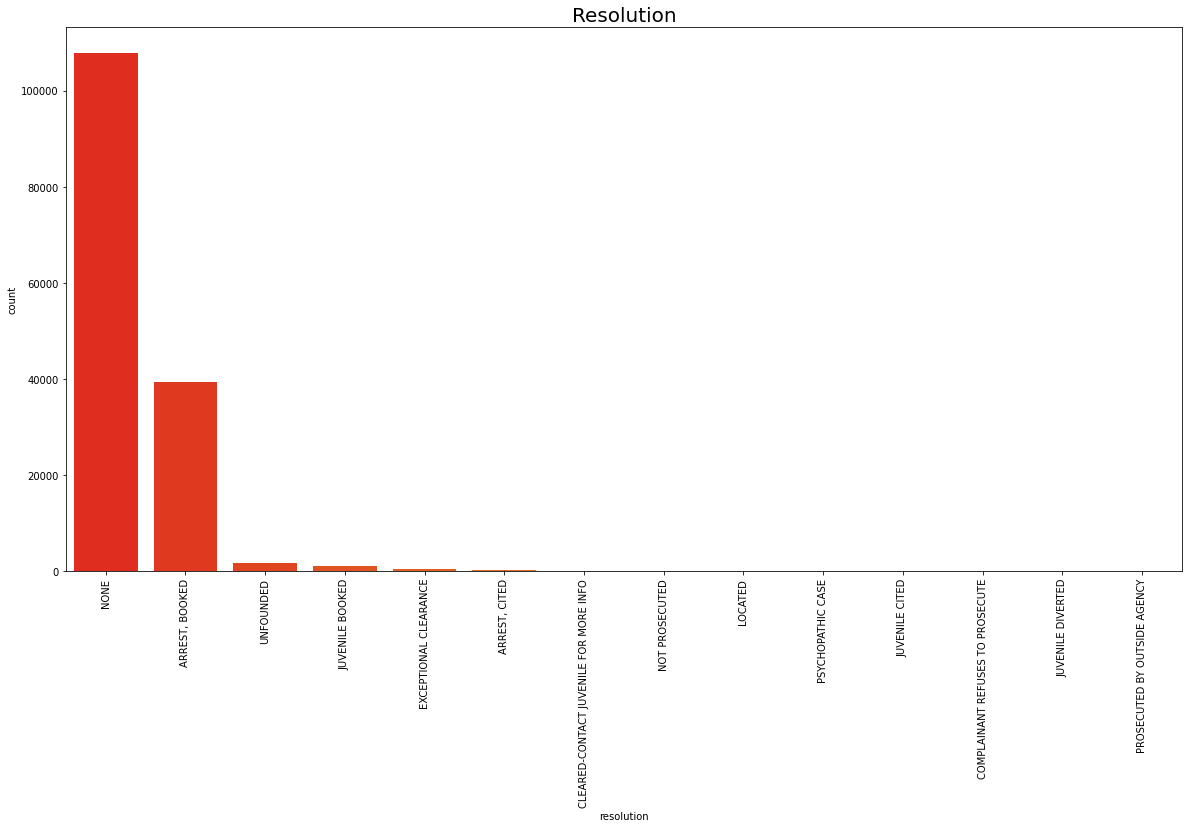

In [54]:
#quarter wise crime rate
sns.countplot(data['resolution'], palette = 'autumn', order = data['resolution'].value_counts().index)
plt.title('Resolution', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

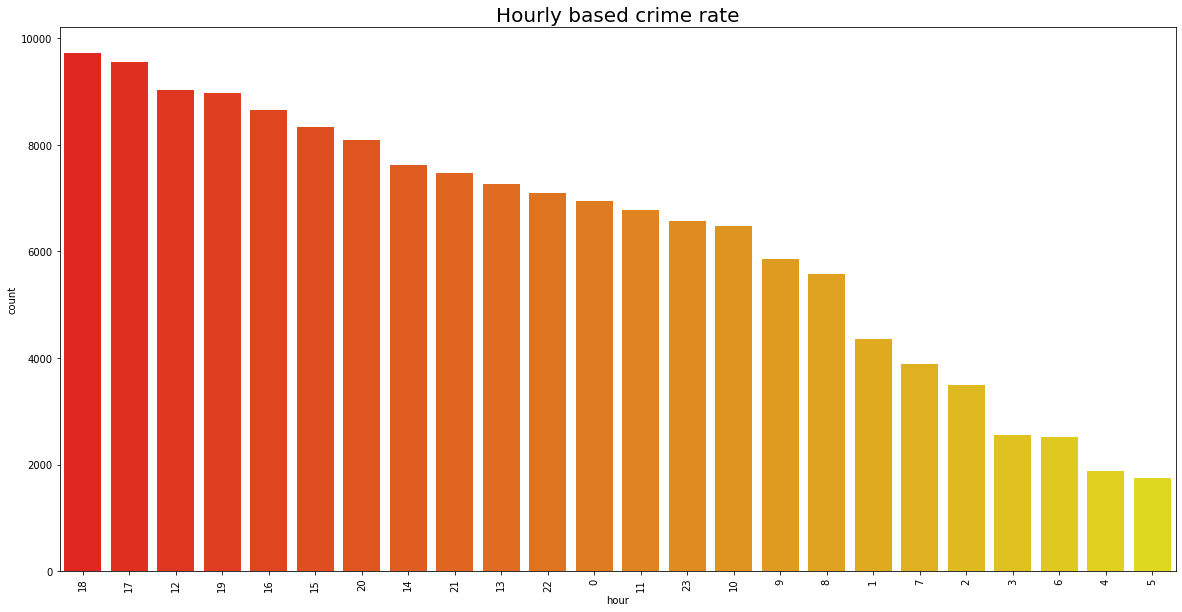

In [110]:
#hourly wise crime rate
sns.countplot(data['hour'], palette = 'autumn', order = data['hour'].value_counts().index)
plt.title('Hourly based crime rate', fontsize = 20)
plt.xticks(rotation=90)
plt.show()


In [119]:
numerical={'SOUTHERN':'red','BAYVIEW':'green','TENDERLOIN':'blue','MISSION':'black','NORTHERN':'purple','TARAVAL':'orange','INGLESIDE':'cyan','CENTRAL':'gray','RICHMOND':'yellow','PARK':'brown'}
data['district']=data['department_district'].map(numerical)
data.head()


,category,crime_description,department_district,resolution,latitude,longitude,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,color_coded_district,district
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",37.775421,-122.403405,2016,1,29,11,29,4,4,4,friday,1,red,red
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",37.775421,-122.403405,2016,1,29,11,29,4,4,4,friday,1,red,red
2,WARRANTS,WARRANT ARREST,BAYVIEW,"ARREST, BOOKED",37.729981,-122.388856,2016,4,25,14,116,17,17,0,monday,2,green,green
3,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,NONE,37.785788,-122.412971,2016,5,1,23,122,17,17,6,sunday,2,blue,blue
4,NON-CRIMINAL,LOST PROPERTY,MISSION,NONE,37.765050,-122.419672,2016,1,1,0,1,53,53,4,friday,1,black,black


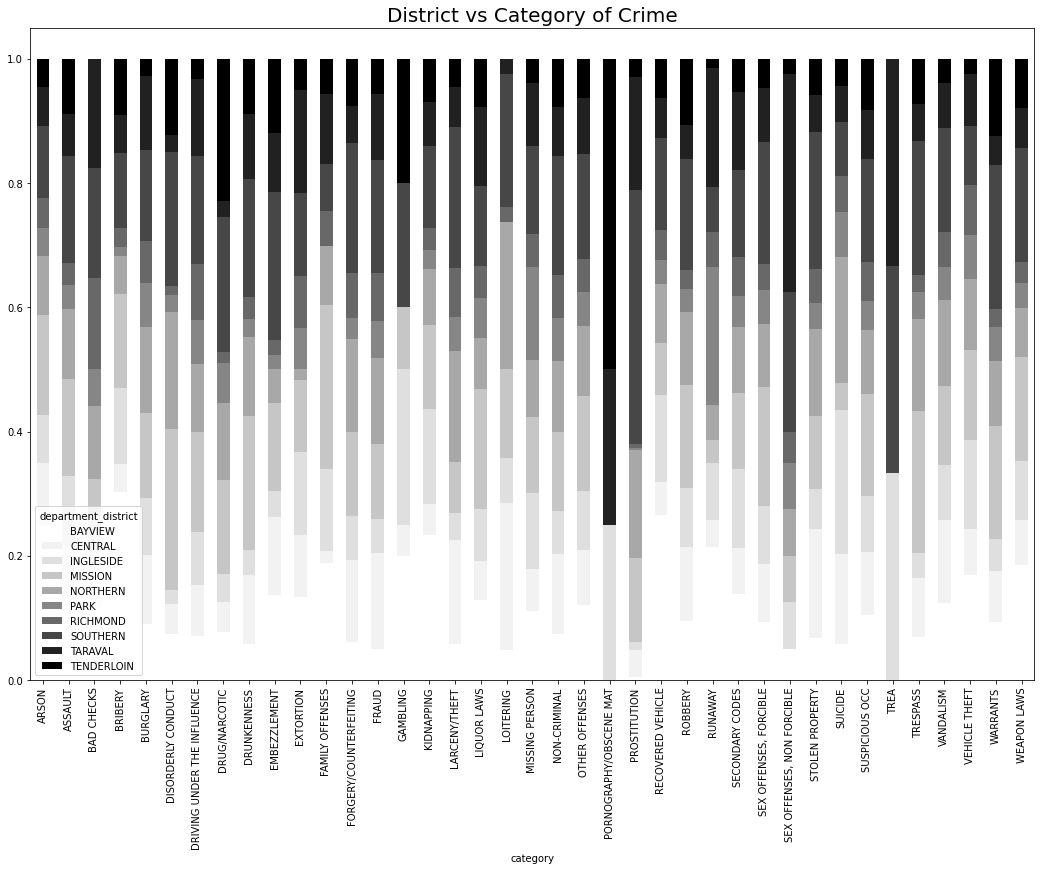

In [128]:
#district vs category of crime
df = pd.crosstab(data['category'], data['department_district'])
color = plt.cm.Greys(np.linspace(0, 1, 10))

df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [129]:
district = data.department_district.value_counts()

table = pd.DataFrame(data=district.values, index=district.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [131]:
import folium
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in City'
)

sf_map